Configure hotplates. By default rely on PPS 5A/21V profile (max voltage after cable loss ~ 20v).

In [7]:
from hotplate_model import HotplateModel
from heater_configs import heaters as cfg

heaters = [
    cfg[0].clone().reset(),
    cfg[0].clone().reset().scale_r_to(2.5).label("80x70x3.8, 2.5R"),
    cfg[0].clone().reset().scale_r_to(2.5).set_size(0.08, 0.07, 0.0028).label("80x70x2.8, 2.5R"),
    cfg[0].clone().reset().scale_r_to(3.33).clamp_voltage(27).set_size(0.08, 0.07, 0.0028).label("80x70x2.8, 3.3R EPR"),
    cfg[0].clone().reset().scale_r_to(4).clamp_voltage(27).set_size(0.08, 0.07, 0.0028).label("80x70x2.8, 4R EPR"),
]

#heaters.append(HotplateModel(x=0.07, y=0.06, z=0.0038).calibrate(T=25, R=2.4).label("70x60x3.8, 2.4R test"))


Simulate transient response.

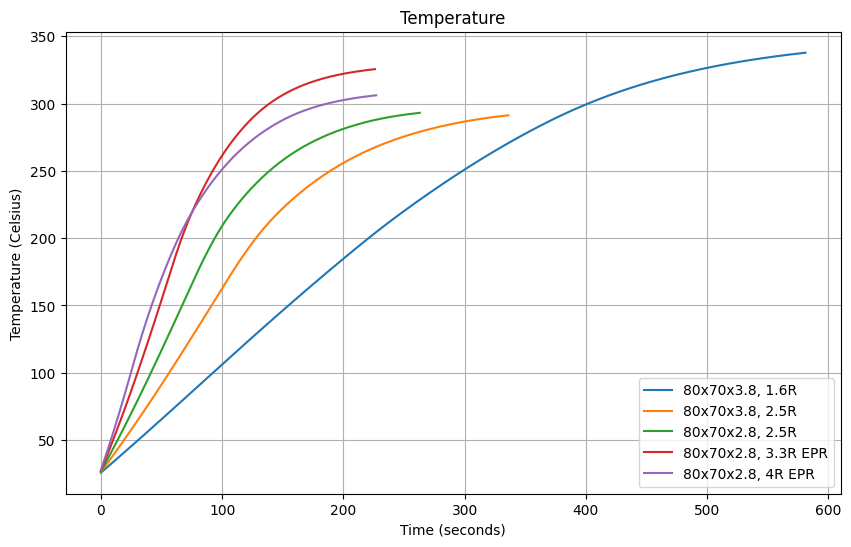

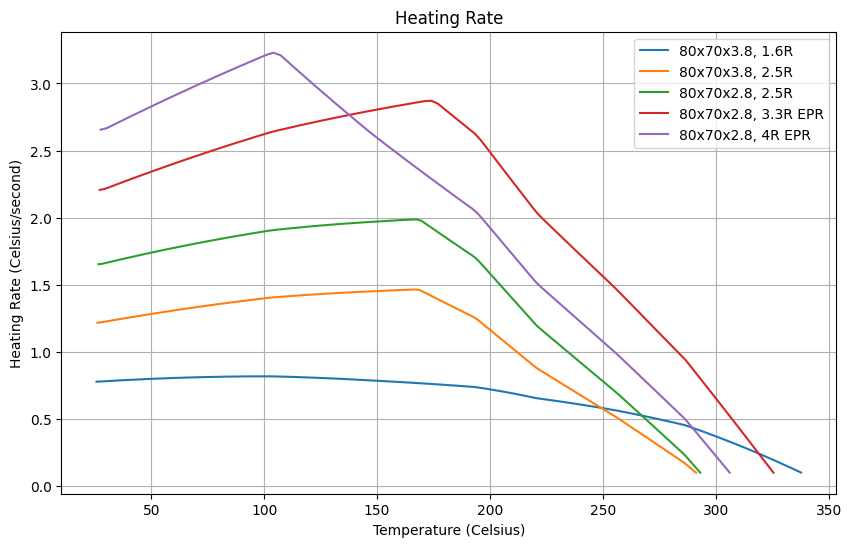

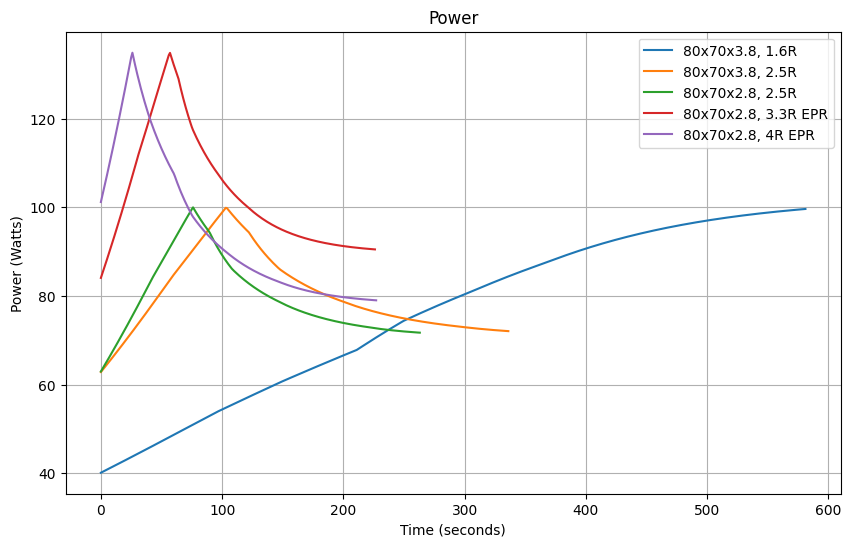

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate heater temperature over time with stabilization check
def simulate_heater(heater, max_time, dt, stabilization_threshold=0.1):
    data = []
    last_temp = heater.temperature

    for t in range(0, max_time + 1, dt):
        heater.iterate(dt)
        data.append({'time': t, 'T': heater.temperature, 'clampedW': heater.get_power()})

        temp_rate = abs(heater.temperature - last_temp) / dt
        if temp_rate < stabilization_threshold:
            break  # Temperature stabilized

        last_temp = heater.temperature

    return data

# Simulate each heater
simulation_data = []
for heater in heaters:
    data = simulate_heater(heater, 10000, 1)
    simulation_data.append({ "name": heater.name, "data": data })

# Plot the temperature data
plt.figure(figsize=(10, 6))
for heater_data in simulation_data:
    times = [point['time'] for point in heater_data["data"]]
    temperatures = [point['T'] for point in heater_data["data"]]
    plt.plot(times, temperatures, label=f"{heater_data['name']}")
plt.title("Temperature")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the heating rate (dT/dT)
plt.figure(figsize=(10, 6))
for heater_data in simulation_data:
    temperatures = [point['T'] for point in heater_data["data"]]
    heating_rates = np.gradient(temperatures)  # Calculate the heating rate
    plt.plot(temperatures, heating_rates, label=f"{heater_data['name']}")
plt.title("Heating Rate")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Heating Rate (Celsius/second)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the real power data
plt.figure(figsize=(10, 6))
for heater_data in simulation_data:
    times = [point['time'] for point in heater_data["data"]]
    powers = [point['clampedW'] for point in heater_data["data"]]
    plt.plot(times, powers, label=f"{heater_data['name']}")
plt.title("Power")
plt.xlabel("Time (seconds)")
plt.ylabel("Power (Watts)")
plt.legend()
plt.grid(True)
plt.show()
